<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/143_158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# p.145
# 4.10 네임스페이스와 스코프
# 파이썬 프로그램에는 다양한 네임스페이스(name space)가 있다.
# 네임스페이스는 특정 이름이 유일하고, 다른 네임스페이스에서의 같은 이름과 관계가 없는 것을 말한다.

# 각 함수는 자신의 네임스페이스를 정의한다. 메인 프로그램에서 x라는 변수를 정의하고, 함수에서 x라는 변수를
# 정의하고, 함수에서 x라는 변수를 정의했을 때, 이들은 서로 다른 것을 참조한다. 다양한 방법으로 다른 네임스페이스의
# 이름을 접근할 수 있다.

In [ ]:
# 함수로부터 전역 변수의 값을 얻을 수 있다.(global variable)
animal='fruitbat'
def print_global():
  print('inside print_global:', animal)
print('at the top level:',animal)
print('print_global()값:',print_global())

at the top level: fruitbat
inside print_global: fruitbat
print_global()값: None


In [ ]:
# 함수에서 전역 변수의 값을 얻어서 바꾸려 하면 에러가 발생한다.
animal='fruitbat'
def change_and_print_global():
  print('inside change and print global:',animal)
  animal='wombat'
  print('after the change:', animal)

change_and_print_global()

UnboundLocalError: local variable 'animal' referenced before assignment

In [ ]:
animal='fruitbat' # 전역변수
def change_and_print_global():
  animal='wombat' # 지역변수
  print('inside change and print global:',animal)

  print('after the change:', animal)

print('change_and_print_global()값:',change_and_print_global())
print('animal값:',animal)

inside change and print global: wombat
after the change: wombat
change_and_print_global()값: None
animal값: fruitbat


In [ ]:
animal='fruitbat'
def change_and_print_global():
  global animal # 전역변수의 접근을 명시 해야 한다.
  animal = 'wombat'
  print('inside change and print global:',animal)

print('animal값:',animal)
change_and_print_global()
animal
# 함수 안에 global 키워드를 사용하지 않으면 파이썬은 로컬 네임스페이스를 사용하고 변수는 지역 변수가 된다.
# 지역 변수는 함수를 수행한 뒤 사라진다.

animal값: fruitbat
inside change and print global: wombat


'wombat'

In [ ]:
# locals()함수: 로컬 네임스페이스의 내용이 담긴 딕셔너리를 반환
# global()함수: 글로벌 네임스페이스의 내용이 담긴 딕셔너리를 반환
animal1='fruitbat' # 전역변
def change_local():
  animal1='wombat' #지역변수
  animal2='wombat' #지역변수
  print('locals:',locals())

change_local()

locals: {'animal1': 'wombat', 'animal2': 'wombat'}


In [ ]:
animal1

'fruitbat'

In [ ]:
# 4.10.1 이름에 _와 __사용
# 두 언더스코어(__)로 시작하고 끝나는 이름: 파이썬 내의 사용을 위해 예약되어 있다.
# 그러므로 변수를 선언 할 때 두 언더스코어를 사용하면 안 된다.

# 함수의 이름: 시스템 변수 function.__name__
# 함수의 docstring: function.__doc__

def amazing():
  '''this is the amzaing function.
  want to see it again?'''
  print('this function is named:', amazing.__name__)
  print('And its docstring is:',amazing.__doc__)

amazing()
####################################

this function is named: amazing
And its docstring is: this is the amzaing function.
  want to see it again?


In [ ]:
# __name__: 현재 모듈의 이름을 나타내며, 모듈이 직접 실행되었는 지 임포트 되었는지 확인하는 데 사용.
# __doc__: 모듈, 클래스, 함수 또는 메서드의 문서 문자열(docstring)을 나타냅니다.
# __init__: 클래스의 생성자 메서드. 객체가 생성될 때 호출됩니다.

In [ ]:
# 4.11 에러 처리하기: try, except
# 일부 언어에서 에러는 특수 함수의 반환값으로 표시된다.
# 파이썬에서는 관련 에러가 발생할 때 실행되는 코드인 예외:exception를 사용한다.
# 어떤 상황에서 실패할 수 있는 코드를 실행했을 때는 모든 잠재적인 에러를 방지하기 위해 적절한 예외 처리가 필요하다.

# 사용자에게 무슨 일이 일어나고 있는 지 알리기 위해 예외가 발생할 수 있는 모든 곳에 예외처리를 하는 것은 좋은 습관이다.
# 이것으로 문제를 해결하지 못할 수도 있지만, 적어도 사용자에게 이 상황을 알리고, 정상적으로 프로그램을 종료할 수 있다.
# 만약 어떤 함수에서 예외가 발생하여 그곳에서 잡히지 않았다면, 호출한 함수에 일치하는 핸들러에 의해서 이 예외를 잡을때까지 버블링한다.
# 만약 여러분이 예외 처리에 대한 핸들러를 제공하지 않았다면, 파이썬은 에러 메시지와 오류가 발생한 위치에 대한 정보를 출력하고 프로그램을 종료한다.

short_list=[1,2,3]
position=5
short_list[position]

IndexError: list index out of range

In [ ]:
# 에러가 예상되는 코드에 try문을 사용하고, 그 에러를 처리하기 위해 except문을 사용한다.
short_list=[1,2,3]
position=5
try:
  short_list[position]
except:
  print('need a position between 0 and',len(short_list)-1, 'but got',position)
# 위에서 IndexError: list index out of range가 발생하는 데, 이를 try~except문으로 대처.
# 각 에러에 대한 특정 예외 핸들러를 사용하는 것이 좋다.

# except 예외 타입 as 이름: 예외 타입을 넘어 예외사항에 대한
# 세부정보를 얻고 싶다면 다음과 같은 변수 이름에서 예외 객체 전체를 얻을 수 있다.

short_list=[1,2,3] # 시퀀스에서 잘못된 위치를 입력할 때 발생하는 예외 타입.
while True: # err변수에 intdexerror 예외를, other 변수에 다른 기타 예외를 저장한다.
  value=input('position [q to quit?]')
  if value == 'q':
    break
  try:
    position=int(value)
    print(short_list[position])
  except IndexError as err: # 3을 입력했을 때, IndexError 발생
    print('bad index:', position)
  except Exception as other:
    print('something else broke:', other)

need a position between 0 and 2 but got 5
position [q to quit?]e
something else broke: invalid literal for int() with base 10: 'e'
position [q to quit?]3
bad index: 3
position [q to quit?]1
2
position [q to quit?]q


In [ ]:
# 4.12 예외 만들기
# indexerror와 같은 모든 예외는 파이썬 표준 라이브러리에 미리 정의되어 있다.
# 우리는 필요한 예외 처리를 선택해서 사용할 수 있다. -> 우리가 만든 프로그램에서 특별한 상황에서 발생할 수
# 있는 예외를 처리하기 위해 예외타입을 정의할 수 있다.

In [ ]:
# words 문자열에 대문자가 있을 때 예외를 발생하는 UppercaseException 예외를 만들어 보자.
class upperCaseException(Exception):
  pass
words=['eeenie','meenie','miny','MO']
for word in words:
  if word.isupper():
    raise upperCaseException(word)

upperCaseException: MO

**chapter 5. 파이 포장하기: 모듈,패키지, 프로그램**

In [ ]:
# 5.1 스탠드얼론 프로그램
# 파이썬 스크립트가 독립적으로 실행될 수 있는 경우를 말합니다.
# 즉, 특정 작업을 수행하거나 문제를 해결하기 위해 작성된 파이썬 코드가
# 다른 종속성이나 환경 없이 단독으로 실행될 수 있는 상태를 뜻합니다.

# 5.2 커맨드 라인 인자
import sys
print('program arguments:',sys.argv)

program arguments: ['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-d3ab623c-dba3-4b4e-81c8-c8f4c0219a61.json']


**5.3 모듈과 import문**

In [ ]:
# 모듈(module): 파이썬 코드의 파일
# import 문을 사용하여 다른 모듈의 코드를 참조한다. 이것은 임포트한 모듈의 코드와 변수를 프로그램에서 사용할 수 있게 만들어준다.

# 5.3.1 모듈 임포트하기
# import 문을 사용하여 간단하게 모듈을 임포트할 수 있다.
# 모듈: .py 확장자가 없는 파이썬 파일의 이름이다.

from random import choice
possibilities = ['rain','snow','sleet','fog','sun','who knows']
choice(possibilities)

# import report: weatherman.py에서 report 모듈을 임포트했다.
# description = report.get_description() : 모듈 파일 report.py의 get_description() 함수에서 파이썬의
# 표준 random 모듈로부터 choice 함수를 임포트했다.

# def get_description():
#   from random import choice
#   possibilities=['rain','snow','sleet','fog','sun','who knows']
#   return choice(possibilities)

'sun'

In [ ]:
def get_description():
  import ranodm
  possibilities=['rain','snow','sleet','fog','sun','who knows']
  return random.choice(possibilities)

In [ ]:
# 5.3.2 다른 이름으로 모듈 임포트하기
import math as mt
# 만약 같은 이름을 사용하는 다른 모듈이 있거나 모듈의 이름을 조금 더 짧게 쓰고 싶다면?
# as: 앨리어스(alias)를 사용한다.

In [ ]:
# 5.3.3. 필요한 모듈만 임포트하기
# 모듈 전체 혹은 모듈의 필요한 부분만 임포트할 수 있다.

ModuleNotFoundError: No module named 'report'

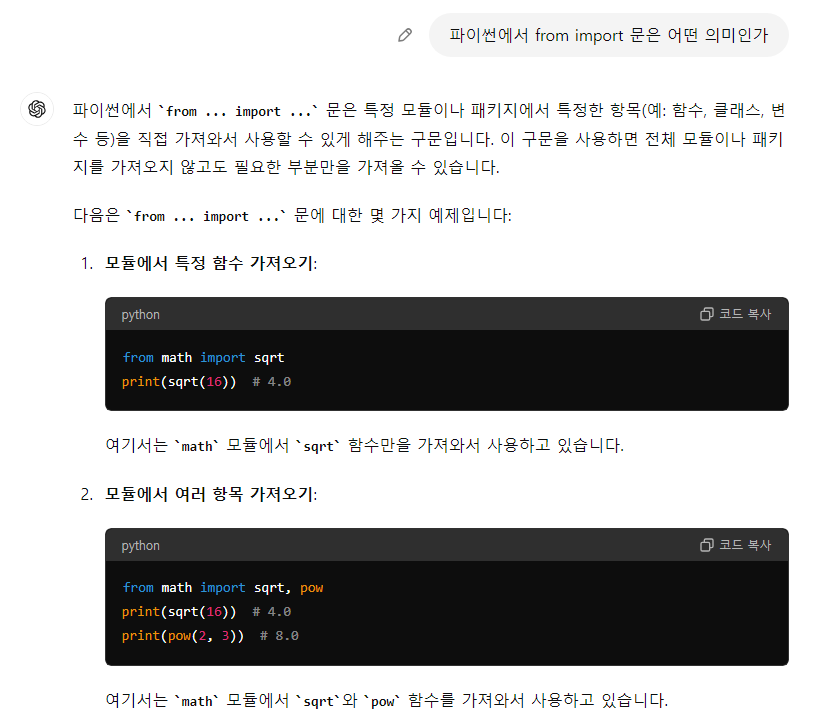

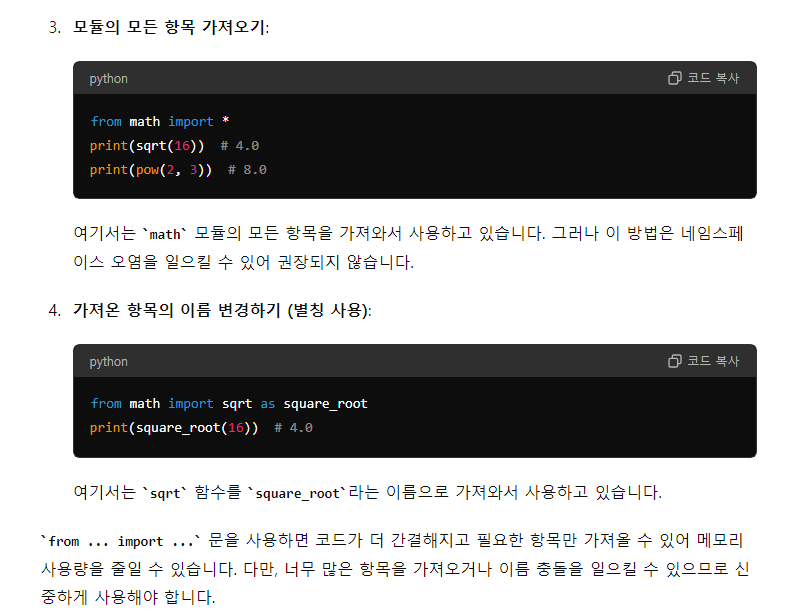

In [1]:
# 5.3.4 모듈 검색 경로
# 파이썬은 임포할 파일을 어디에서 찾을까? 디렉터리 이름의 리스트와 표준 sys모듈에서 저장되어 있는 zip 아카이브 파일을
# 변수 path로 사용한다.
import sys
for place in sys.path:
  print(place)

/content
/env/python
/usr/lib/python310.zip
/usr/lib/python3.10
/usr/lib/python3.10/lib-dynload

/usr/local/lib/python3.10/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.10/dist-packages/IPython/extensions
/root/.ipython
